# *Projektni zadatak iz predmeta "Princip prezentacije i prepoznavanje oblika"*

Student: Jana Kozova IT47/2020

---
---






# ***Segmentacija***
####Teorijska osnova:
*Segmentacija* mašinskog učenja na ultrazvučnim slikama je proces automatskog identifikovanja i označavanja regiona od interesa na ultrazvučnim slikama pomoću tehnika mašinskog učenja. Ovaj proces ima široku primenu u medicini, posebno u oblastima kao što su radiologija i dijagnostika, gde je važno precizno identifikovati anatomsku strukturu ili patološke promene na slikama.

Korišćenje tehnika mašinskog učenja za segmentaciju ultrazvučnih slika omogućava automatsku analizu velikog broja slika brže i preciznije nego što bi to moglo biti urađeno ručno. Ove tehnike obično uključuju korišćenje algoritama dubokog učenja, poput konvolutivnih neuronskih mreža (CNN), koji su pokazali izuzetnu efikasnost u segmentaciji slika u medicinskim aplikacijama.

*Segmentacija* mašinskog učenja na ultrazvučnim slikama može imati različite svrhe, uključujući identifikaciju i praćenje promena u anatomiji, detekciju i lokalizaciju patologija poput tumora ili cista, kao i podršku u planiranju i vođenju hirurških zahvata.

*Šta je segmentacija dataseta?*

> Segmentacija dataseta je proces grupisanja sličnih instanci podataka zajedno kako bi se olakšala analiza i dobijanje insajta iz podataka.

*Zašto je važna segmentacija dataseta?*
> Segmentacija dataseta omogućava identifikaciju skrivenih obrazaca u podacima, personalizaciju usluga, i poboljšanje donošenja odluka.


*Kako se vrši segmentacija dataseta?*
> Za segmentaciju ultrazvučnih slika sa identifikovanim nervom, koristi se U-Net konvulcijska mreža. U-Net se može posmatrati kao mreža enkodera koju prati mreža dekodera. Enkoder se koristi za ekstrakciju karakteristika iz slike, dok dekoder rekonstruiše segmentiranu sliku.


*Odabir U-Net konvulcijske mreže za segmentaciju dataseta*
>Za segmentaciju ultrazvučnih slika sa identifikovanim nervom odabran je U-Net zbog njegove sposobnosti da efikasno identifikuje skupove podataka u prostoru visoke dimenzionalnosti. U-Net se pokazao kao efikasan algoritam za segmentaciju medicinskih slika, uključujući i slike sa identifikovanim nervom.

###Zaključak
Ističemo važnost segmentacije dataseta u medicinskim aplikacijama kao što je identifikacija nervnih struktura na ultrazvučnim slikama. Implementacija U-Net konvulcijske mreže pokazala je efikasnost u segmentaciji i identifikovanju nervnih struktura, što je od ključnog značaja za dijagnostiku i lečenje.


####Projektni zadatak:
Set podataka:
>Dati set podataka sadrži dva foldera, za treniranje i testiranje modela. Train folder sadrži pored slika ultrazvuka i maske sa identifikovanim nervom.

***
Ucitavanje dataseta


In [1]:
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://drive.google.com/u/0/uc?id=1PRazw6hFwo1qKXqb4RQYwtQL-c83XUja&export=download' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1PRazw6hFwo1qKXqb4RQYwtQL-c83XUja" -O dataset.zip && rm -rf /tmp/cookies.txt


--2024-04-08 19:49:34--  https://docs.google.com/uc?export=download&confirm=&id=1PRazw6hFwo1qKXqb4RQYwtQL-c83XUja
Resolving docs.google.com (docs.google.com)... 173.194.194.100, 173.194.194.101, 173.194.194.113, ...
Connecting to docs.google.com (docs.google.com)|173.194.194.100|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1PRazw6hFwo1qKXqb4RQYwtQL-c83XUja&export=download [following]
--2024-04-08 19:49:34--  https://drive.usercontent.google.com/download?id=1PRazw6hFwo1qKXqb4RQYwtQL-c83XUja&export=download
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 209.85.145.132, 2607:f8b0:4001:c1e::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|209.85.145.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2439 (2.4K) [text/html]
Saving to: ‘dataset.zip’

dataset.zip         100%[===================>]   2.38K  --.-KB/s    in 0s    

*** *italicized text*
Izgleda da je problem u tome što wget ne može direktno da preuzme datoteku sa Google Drive-a na ovaj način

In [2]:
!unzip dataset.zip

Archive:  dataset.zip
  End-of-central-directory signature not found.  Either this file is not
  a zipfile, or it constitutes one disk of a multi-part archive.  In the
  latter case the central directory and zipfile comment will be found on
  the last disk(s) of this archive.
unzip:  cannot find zipfile directory in one of dataset.zip or
        dataset.zip.zip, and cannot find dataset.zip.ZIP, period.


***
gdown je alat koji omogućava preuzimanje datoteka sa Google Drive-a putem komandne linije. On olakšava preuzimanje datoteka sa Google Drive-a bez potrebe da se ručno deli datoteka ili menja podešavanja privatnosti datoteke

In [3]:
!pip install gdown

In [4]:
!gdown --id 1PRazw6hFwo1qKXqb4RQYwtQL-c83XUja --output dataset.zip

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:138: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=1PRazw6hFwo1qKXqb4RQYwtQL-c83XUja
From (redirected): https://drive.google.com/uc?id=1PRazw6hFwo1qKXqb4RQYwtQL-c83XUja&confirm=t&uuid=f97f2ee3-e8e7-49eb-9dc7-80fd9ee5c345
To: /content/dataset.zip
100% 2.27G/2.27G [00:30<00:00, 75.0MB/s]


In [5]:
!unzip dataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: train/34_114_mask.tif   
  inflating: train/34_115.tif        
  inflating: train/34_115_mask.tif   
  inflating: train/34_116.tif        
  inflating: train/34_116_mask.tif   
  inflating: train/34_117.tif        
  inflating: train/34_117_mask.tif   
  inflating: train/34_118.tif        
  inflating: train/34_118_mask.tif   
  inflating: train/34_119.tif        
  inflating: train/34_119_mask.tif   
  inflating: train/34_11_mask.tif    
  inflating: train/34_12.tif         
  inflating: train/34_12_mask.tif    
  inflating: train/34_13.tif         
  inflating: train/34_13_mask.tif    
  inflating: train/34_14.tif         
  inflating: train/34_14_mask.tif    
  inflating: train/34_15.tif         
  inflating: train/34_15_mask.tif    
  inflating: train/34_16.tif         
  inflating: train/34_16_mask.tif    
  inflating: train/34_17.tif         
  inflating: train/34_17_mask.tif    
  inflating: train/34_18.tif         

***
Da bismo dodali module, prvo da instaliramo potrebne biblioteke

*Segmentation_models_pytorch*
>Je bilioteka sa neuronskim mrežama koja se koristi za segmentaciju fotografija, pri čemu je zasnovana na biblioteci za mašinsko učenje otvorenog koda PyTorch i iz nje se pozivaju modeli koji će se nešto kasnije trenirati

*Early stopping*
>Je tehnika koja se koristi kako bi se zaustavila obuka modela u slučaju da prosleđeni parametri prestanu da se poboljšavaju

In [6]:
!git clone https://github.com/Bjarten/early-stopping-pytorch.git esp


Cloning into 'esp'...
remote: Enumerating objects: 92, done.
remote: Total 92 (delta 0), reused 0 (delta 0), pack-reused 92
Receiving objects: 100% (92/92), 533.89 KiB | 4.38 MiB/s, done.
Resolving deltas: 100% (39/39), done.


In [7]:
!pip install git+https://github.com/qubvel/segmentation_models.pytorch


  Cloning https://github.com/qubvel/segmentation_models.pytorch to /tmp/pip-req-build-dxfzmsqz
  Running command git clone --filter=blob:none --quiet https://github.com/qubvel/segmentation_models.pytorch /tmp/pip-req-build-dxfzmsqz
  Resolved https://github.com/qubvel/segmentation_models.pytorch to commit 6db76a1106426ac5b55f39fba68168f3bccae7f8
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 784.5 kB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 12.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 19.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 35.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 31.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━

Dodavanje modula:

In [8]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
from torch.utils.data import Dataset, DataLoader
import torchvision
from torchvision import transforms

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

from torchvision import transforms
from PIL import Image

import segmentation_models_pytorch as smp
from esp.pytorchtools import EarlyStopping

import matplotlib.pyplot as plt

***
Ucitavanje CSV datoteke 'train_masks.csv' koja sadrzi informacije o maskama nerva. Tabela sadrzi subjekat,sliku i piksel

In [9]:
train_masks = pd.read_csv("train_masks.csv")

In [75]:

train_masks.head(15)



,subject,img,pixels
0,1,1,168153 9 168570 15 168984 22 169401 26 169818 ...
1,1,2,96346 7 96762 16 97179 27 97595 35 98012 40 98...
2,1,3,121957 2 122365 26 122784 28 123202 31 123618 ...
3,1,4,110980 9 111393 21 111810 33 112228 43 112647 ...
4,1,5,NaN
5,1,6,NaN
6,1,7,172767 15 173175 29 173591 34 173993 7 174004 ...
7,1,8,NaN
8,1,9,NaN
9,1,10,NaN


Ovaj dijagram prikazuje koliko često se svaki subjekt pojavljuje u tabeli train_masks. Ovo može biti korisno za analizu jer omogućava da vidim da li imam ravnomernu distribuciju podataka po subjektima ili postoji neka nebalansiranost u broju podataka za različite subjekte, kao sto mogu da primetim, za neke subjekte imam mnogo više podataka nego za druge, što može uticati na performanse modela za obradu tih podataka

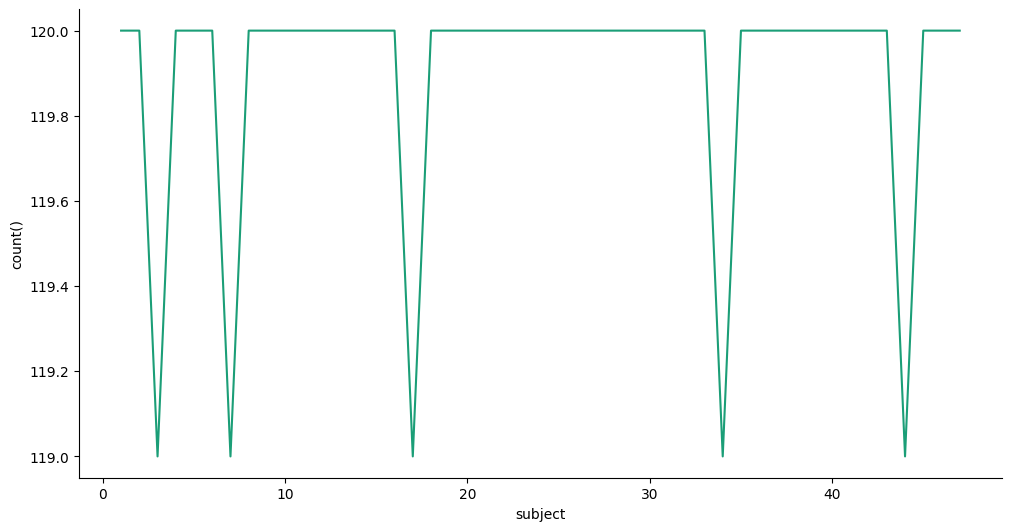

In [38]:


from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['subject']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'subject'}, axis=1)
              .sort_values('subject', ascending=True))
  xs = counted['subject']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = train_masks.sort_values('subject', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('subject')
_ = plt.ylabel('count()')

***
Iscitavamo informacije za csv fajl train_masks:


RangeIndex: 5635 entries, 0 to 5634:
>Ovaj deo pokazuje da DataFrame ima 5635 redova, od 0 do 5634

Data columns (total 3 columns):
>Ukupno ima 3 kolone

Column:
>Ime kolone

Non-Null Count:
>Broj ne-nula vrednosti u svakoj koloni, npr. subject i img imaju 5635 ne-nula vrednosti, što znači da nemaju nedostajuće vrednosti. Ali, pixels kolona ima samo 2323 ne-nula vrednosti, što znači da ima 3312 nedostajućih vrednosti, tj nemaju masku, nemaju ni nerve

Dtype:
>Tip podataka u svakoj koloni



In [39]:
train_masks.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5635 entries, 0 to 5634
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   subject  5635 non-null   int64 
 1   img      5635 non-null   int64 
 2   pixels   2323 non-null   object
dtypes: int64(2), object(1)
memory usage: 132.2+ KB







Vizuelni prikaz ne-nula vrednosti u pomenutim kolonama

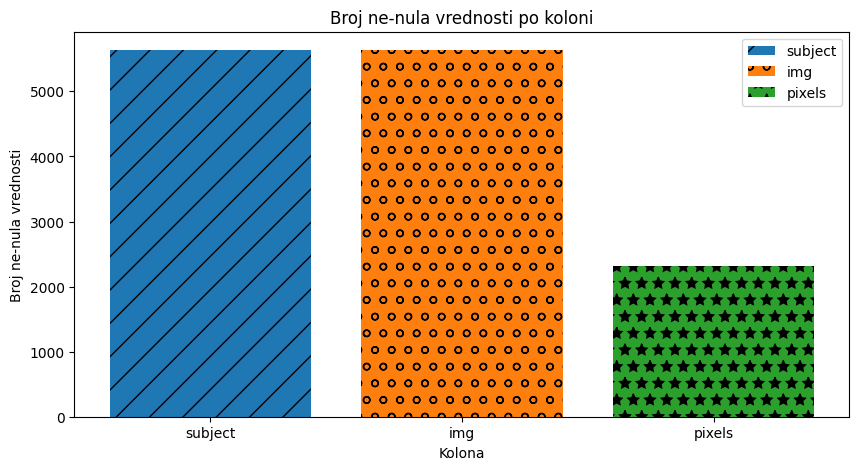

In [40]:
import matplotlib.pyplot as plt
import numpy as np

non_null_counts = [5635, 5635, 2323]

columns = ['subject', 'img', 'pixels']


fig, ax = plt.subplots(figsize=(10, 5))
patterns = ["/", "o", "*"]
for i, (count, column) in enumerate(zip(non_null_counts, columns)):
    ax.bar(column, count, hatch=patterns[i % len(patterns)], label=column)


ax.set_xlabel('Kolona')
ax.set_ylabel('Broj ne-nula vrednosti')
ax.set_title('Broj ne-nula vrednosti po koloni')
ax.legend()
plt.show()


***
Funkcija 'checkpoint' koja ce biti dodana u klasu 'EartlyStopping' kao metoda 'save_checkpoint'. Kao sto sam gore napomenula, 'checkpoint' je funkcija modula 'pickle' i sluzi za cuvanje modela u binarnom formatu.
 Ovo omogućava da se model čuva tokom treninga i da se kasnije može ponovo koristiti ili analizirati


In [41]:
def save_checkpoint(self, val_loss, model):
    import pickle
    if self.verbose:
        self.trace_func(f'Validation loss decreased ({self.val_loss_min:.6f} --> {val_loss:.6f}).  Saving model ...')
    with open(self.path, 'wb') as f:
        pickle.dump(model, f)
    self.val_loss_min = val_loss

In [42]:
EarlyStopping.save_checkpoint = save_checkpoint





***
Imamo putanje, za trening, testiranje i putanju do csv fajla.

In [43]:
train_path = 'train'
test_path = 'test'

In [44]:
train_csv_path = 'train_annotation.csv'


Iz ovog koda mozemo zakljuciti da nam je cilj prikazati sliku i odgovarajucu masku iste dimenzije, dok ce treca slika pokazivati gde je nerv

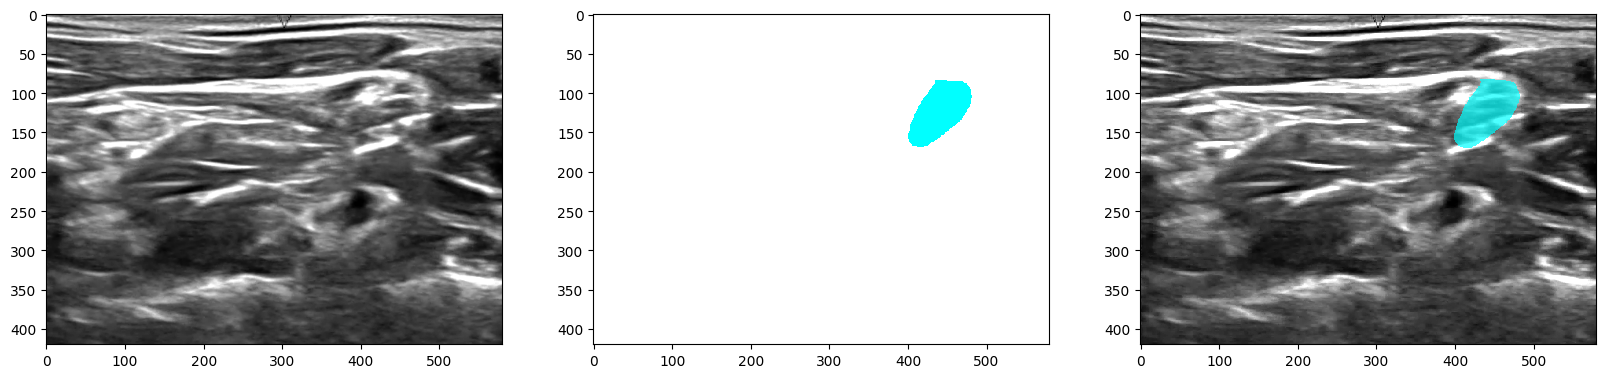

In [45]:
img1 = np.array(Image.open("train/"+"1_1.tif"))
img1_mask = np.array(Image.open("train/"+"1_1_mask.tif"))
img1_mask = np.ma.masked_where(img1_mask == 0, img1_mask)

fig, ax = plt.subplots(1, 3, figsize = (20, 20))
ax[0].imshow(img1, cmap = "gray")

ax[1].imshow(img1_mask, cmap = "cool")

ax[2].imshow(img1, cmap = "gray", interpolation = "none")
ax[2].imshow(img1_mask, cmap = "cool", interpolation = "none", alpha = 0.7)

***
Ova funkcija se koristi za generisanje CSV datoteke koja će sadržati informacije o slikama i njihovim maskama.

Prvo, prolazi kroz sve fajlove u određenoj putanji data_path.
Za svaki fajl koji sadrži ključnu reč key_word u svom imenu, izdvaja deo imena koji se poklapa sa stringom to_delete i koristi ga kao naziv slike.
Zatim, kreira DataFrame koji sadrži naziv slike (img) i naziv maske (file_name) i dodaje ga u CSV datoteku na putanji out_csv_path.
Ovaj proces omogućava organizovanje i čuvanje informacija o slikama i maskama u struktuiranom formatu koji se može dalje koristiti u analizi ili obradi podataka

In [52]:
import pandas as pd
import os

def create_csv(data_path, out_csv_path, key_word='mask'):
    # Inicijalizacija praznog DataFrame-a za čuvanje podataka
    data = pd.DataFrame(columns=['img', 'mask'])

    for file_name in os.listdir(data_path):
        if key_word in file_name:
            img = file_name.replace(f'_{key_word}', '')
            new_data = pd.DataFrame({'img': [img], 'mask': [file_name]})
            data = pd.concat([data, new_data], ignore_index=True)

    # Provera da li postoji CSV fajl
    if not os.path.exists(out_csv_path):
        data.to_csv(out_csv_path, header=True, index=False)
    else:
        # Provera da li se podaci već nalaze u CSV fajlu
        existing_data = pd.read_csv(out_csv_path)
        new_data = data[~data['img'].isin(existing_data['img'])]
        if not new_data.empty:
            new_data.to_csv(out_csv_path, mode='a', header=False, index=False)




Ovaj poziv funkcije csv koristi se za generisanje CSV datoteke koja će sadržati informacije o slikama i njihovim maskama

>data_path=train_path: Ovo označava putanju do foldera u kojem se nalaze slike i maske

>out_csv_path=train_csv: Ovo označava putanju gde će biti sačuvana CSV datoteka koja sadrži informacije o slikama i maskama

Pozivanje ove funkcije generisaće CSV datoteku sa informacijama o slikama i maskama iz foldera train_path i sačuvaće je na lokaciji train_csv

Iščitavanje i prikaz prethodno kreiranog CSV fajla sa slikama i odgovarajućim maskama



In [53]:
create_csv(data_path=train_path, out_csv_path=train_csv_path)

In [71]:
import pandas as pd
train_df = pd.read_csv(train_csv_path)


def highlight_second_column(s):
    return ['background-color: blue' if i % 2 != 0 else '' for i in range(len(s))]


train_df.head(20).style.apply(highlight_second_column)


,img,mask
0,47_9.tif,47_9_mask.tif
1,32_101.tif,32_101_mask.tif
2,34_99.tif,34_99_mask.tif
3,41_93.tif,41_93_mask.tif
4,4_46.tif,4_46_mask.tif
5,27_113.tif,27_113_mask.tif
6,28_39.tif,28_39_mask.tif
7,21_50.tif,21_50_mask.tif
8,19_99.tif,19_99_mask.tif
9,22_1.tif,22_1_mask.tif


***
Kreiramo set podataka za sam model, gde smeštamo učitane slike i odgovarajuće maske



In [55]:
class ImageDataset(Dataset):
    def __init__(self, df, root_dir, transform=None):
        self.df = df
        self.root_dir = root_dir
        self.transform = transform

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        if torch.is_tensor(idx):
            idx = idx.tolist()

        mask = Image.open(os.path.join(self.root_dir, self.df.iloc[idx, 0]))
        image = Image.open(os.path.join(self.root_dir, self.df.iloc[idx, 1]))

        if self.transform:
            return self.transform(image), self.transform(mask)

        return image, mask

In [56]:
train_samples = ImageDataset(df=train_df, root_dir=train_path)


Prikazujemo primere slika i maski koji su kreirani u prethodnim koracima

In [57]:
def draw_samples(data, n_col, n_row):
    fig = plt.figure(figsize=(20, 5))

    for i in range(1, n_col + 1):
        img_ax = fig.add_subplot(n_row, n_col, i)
        msk_ax = fig.add_subplot(n_row, n_col, i + n_col)

        img_ax.imshow(data[i-1][0], cmap="gray")
        msk_ax.imshow(data[i-1][1], cmap="gray")

    fig.show()

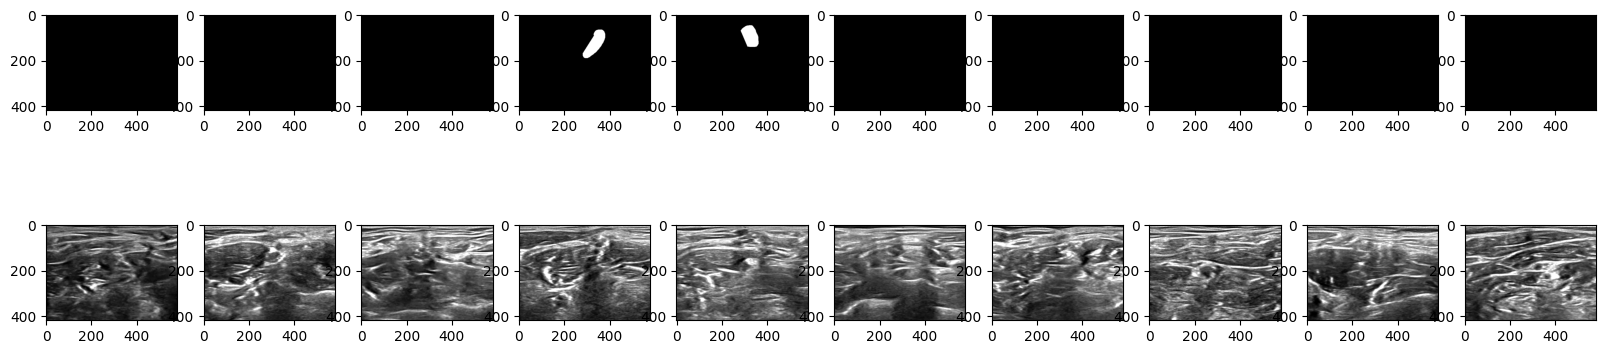

In [58]:
draw_samples(data=train_samples, n_col = 10, n_row = 2)


***

***

Ovaj kod se koristi za kreiranje Unet modela za segmentaciju slika. Unet je arhitektura za segmentaciju slika, posebno u biomedicinskoj obradi slika. U ovom konkretnom slučaju, koristi se VGG11 enkoder. Krajnji rezultat je model, koji može da segmentira slike i identifikuje regione od interesa na njima, što je korisno u mnogim aplikacijama, kao što su medicinska dijagnostika, detekcija objekata, i druge oblasti gde je potrebna precizna analiza slika



In [59]:
ENCODER = 'vgg11_bn'
ENCODER_WEIGHTS = 'imagenet'
ACTIVATION = 'sigmoid'
DEVICE = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

>encoder_name ---> Naziv klasifikacionog modela koji se koristi kao ekstraktor karakteristika za izgradnju segmentacionog modela

>encoder_weights ---> Da li želimo da koristimo težine unapred obučenog enkodera. Ovo može biti "imagenet" ako želimo da koristimo težine trenirane na ImageNet skupu podataka ili None ako želimo da treniramo model od nule

>in_channels ---> broj ulaznih kanala

>classes ---> Broj klasa koje model treba da predvidi. U ovom slučaju, koristi se 1

>activation ---> Aktivaciona funkcija koja se koristi na izlazu modela.Uobičajene aktivacione funkcije su "sigmoid" za binarnu klasifikaciju i "softmax2d" za višeklasnu klasifikaciju

In [60]:
model = smp.Unet(
    encoder_name=ENCODER,
    encoder_weights=ENCODER_WEIGHTS,
    in_channels=1,
    classes=1,
    activation=ACTIVATION
)

Downloading: "https://download.pytorch.org/models/vgg11_bn-6002323d.pth" to /root/.cache/torch/hub/checkpoints/vgg11_bn-6002323d.pth
100%|██████████| 507M/507M [00:05<00:00, 91.1MB/s]


***
Ovaj kod se koristi u pripremi za trening neuronske mreže za segmentaciju slika.

Sve ove komponente zajedno čine osnovne pripreme za obuku modela za segmentaciju slika, uključujući definisanje gubitka, metrika, optimizatora, transformacija slika i druge korake koji su neophodni za uspešnu obuku modela

>loss ---> ne sme biti preko 1

>metrics---> treba da bude što bliže 1

>optimizer ---> optimizator za LR (Learning Rate)

>scheduler ---> prilagođava LR između iteracija

In [61]:
import segmentation_models_pytorch.utils as smpu


In [62]:
loss = smp.utils.losses.DiceLoss()
metrics = [smp.utils.metrics.IoU()]
optimizer = torch.optim.Adam
scheduler = lr_scheduler.StepLR

In [63]:
my_transforms = transforms.Compose([
    transforms.Resize(size=(224, 224)),
    transforms.ToTensor()
])

In [64]:
def split_df(df, fraction=0.8):
    df_1 = df.sample(frac=fraction)
    return df_1, df.drop(df_1.index)

***

***
Ovo nam omogućava da efikasno obučimo model za segmentaciju slika, prateći gubitak i metrike tokom obuke,zaustavljajući obuku ako se model prestane poboljšavati. Na ovaj nacin, model se gradi ispitivanjem razlicitih primera i pokusajem pronalska modela koji minimizira gubitak. Posle uspešnog treniranja model se cuva

In [65]:
def train(model, train_df, train_dir, optimizer, loss, metrics,
          learning_rate=0.01, batch_size=20, epochs=10, patience=3,
          scheduler=None, step_size=5, gamma=0.1, device='cpu', transform=None):

    early_stopping = EarlyStopping(patience, path='best_model.pkl', verbose=True)
    optimizer = optimizer(model.parameters(), learning_rate)

    if scheduler:
        scheduler = scheduler(optimizer, step_size, gamma)

    train_epoch = smp.utils.train.TrainEpoch(
        model, loss, metrics, optimizer, device, verbose=True
    )

    valid_epoch = smp.utils.train.ValidEpoch(
        model, loss, metrics, device, verbose=True
    )

    train_logs, valid_logs = [], []

    for epoch in range(epochs):
        train_dataframe, val_dataframe = split_df(train_df)

        train_dataset = ImageDataset(train_dataframe, train_dir, transform=transform)

        valid_dataset = ImageDataset(val_dataframe, train_dir, transform=transform)

        train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                                   batch_size=batch_size,
                                                   shuffle=True)

        valid_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                                   batch_size=batch_size,
                                                   shuffle=False)

        print(f'\nEpoch: {epoch+1}/{epochs}')

        train_log = train_epoch.run(train_loader)
        valid_log = valid_epoch.run(valid_loader)

        train_logs.append(train_log)
        valid_logs.append(valid_log)

        early_stopping(valid_log[loss.__name__], model)

        if early_stopping.early_stop:
            print("Early stopping")
            break

        if scheduler:
            scheduler.step()

    return train_logs, valid_logs

In [ ]:
res = train(model=model,
            train_df=train_df,
            train_dir=train_path,
            optimizer=optimizer,
            loss=loss,
            learning_rate=0.01,
            metrics=metrics,
            batch_size=20,
            epochs=20,
            scheduler=scheduler,
            step_size=10,
            patience=3,
            device=DEVICE,
            transform=my_transforms)


Epoch: 1/20
train:   5%|▍         | 11/226 [06:23<2:04:29, 34.74s/it, dice_loss - 0.4375, iou_score - 0.3914]

***

***
U daljim koracima prikazuje se graficki prikaz rezultata

Snimanje rezultata
>Prvo se koristi biblioteka pickle za snimanje rezultata treninga modela. Druga linija koda nam govori da objekat 'ras' je zapisan kao niz bajtova u datoteku 'result.pkl', cime se omogucava cuvanje objekata na disku. Zatim se ucitava najbolji model koji je sacuvan, koji smo definisali u prethodnim koracima

Vizuelizacija rezlutata
>Koristi se funkcija draw_graphic koja prima DataFrame objekte koji predstavljaju logove treninga i validacije. Ova funkcija crta grafikon sa vremenom (epohama) na x-osi i metrikom na y-osi.
Grafikoni prikazuju kako se metrika menja tokom epoha za trening i validaciju, što pomaže u analizi performansi modela tokom treninga

In [ ]:
import pickle

In [ ]:
with open('results.pkl', 'wb') as f:
    pickle.dump(res, f)

In [ ]:
with open('best_model.pkl', 'rb') as f:
    best_model = pickle.load(f)


In [ ]:
train_logs_df = pd.DataFrame(res[0])
valid_logs_df = pd.DataFrame(res[1])

res_dict = {'train': train_logs_df, 'valid': valid_logs_df}

In [ ]:
def draw_graphic(df_dict, title, criteria, xlab, ylab, colors=['y', 'c'],
                 legend_loc='best', figsize=(12, 8), fontsize=14):
    fig = plt.figure(figsize=figsize)
    for i, key in enumerate(df_dict):
        plt.plot(df_dict[key].index.tolist(), df_dict[key][criteria].tolist(), colors[i], lw=3, label=key)
    plt.xlabel(xlab, fontsize=fontsize)
    plt.ylabel(ylab, fontsize=fontsize)
    plt.title(title, fontsize=fontsize)
    plt.legend(loc=legend_loc, fontsize=fontsize)
    plt.grid()

    fig.show()

Prikaz koliko je bilo preklapanja izmedju predicted i ground truth, sto je izrazeno u opsegu od 0 do 1.
>0 znaci da nema preklapanja izmedju stvarnog i naseg predvidjanja

>1 oznacava savrseno preklapanje izmedju stvarnog i predvidjanog



In [ ]:
draw_graphic(df_dict=res_dict, title='IoU scores', criteria='iou_score', xlab='epochs', ylab='IoU score')


***
Prikaz koliko je bilo odstupanja tokom epoha treniranja



In [ ]:
draw_graphic(df_dict=res_dict, title='Dice Losses', criteria='dice_loss', xlab='epochs', ylab='IoU score')


***

***
Na samom kraju se testira model nad test podacima i sve to se cuva u submission fajlu



In [ ]:
def rle_encoding(x):
    dots = np.where(x.T.flatten()==1)[0]
    run_lengths = []
    prev = -2
    for b in dots:
        if (b>prev+1): run_lengths.extend((b+1, 0))
        run_lengths[-1] += 1
        prev = b
    return run_lengths

In [ ]:
from tqdm.notebook import tqdm


In [ ]:
imgs = [f for f in os.listdir(test_path)]
imgs = sorted(imgs, key=lambda s: int(s.split('.')[0]))

Definisanje i pozivanje funkcije koja će u CSV fajl upisivati podatke o tome da li se na fotografiji nalazi nerv ili ne, u odnosu na prethodno istreniran model



In [ ]:
def create_csv_submission(model, data_path, img_list, out_path):
    submission_df = pd.DataFrame(columns=['img', 'pixels'])
    model.to(DEVICE)
    model.eval()

    for i, img in enumerate(tqdm(img_list)):
        x = Image.open(os.path.join(data_path, img))

        x = my_transforms(x)

        x = x.unsqueeze(0).to(DEVICE)
        pred_mask = model.predict(x)

        pred_mask = pred_mask.cpu()
        pred_mask = transforms.Resize(size=(420, 580))(pred_mask)

        encoding = rle_encoding(pred_mask)

        pixels = ' '.join(map(str, encoding))
        submission_df.loc[i] = [str(i+1), pixels]

    submission_df.to_csv(out_path, index=False)

In [ ]:
create_csv_submission(model=model,
                      data_path=test_path,
                      img_list=imgs,
                      out_path='submission.csv')

***
Iscitavanje i prikaz submission fajla

In [ ]:
test_res = pd.read_csv("submission.csv")

In [ ]:

test_res.head()